## Importações necessárias

In [57]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import random

## Definição de funções

### Função de leitura

In [101]:
def load_spam_collection(data_path, seed=123):
    spamfilter_df = pd.read_csv(data_path, delimiter='\t', header=None)
    spamfilter_df.columns = ['label', 'message']
    
    ''' 
        All labels were changed to the following classification: 
        spam is converted to 1 and ham to 0.
    '''
    spamfilter_df['label'] = spamfilter_df['label'].apply(
        lambda x: 1 if(x == 'spam')
        else 0
    )

    '''
    Adding an additional column that represents the number of letters 
    per message, thus creating a table that provides the sample size information.
    '''
    spamfilter_df['sample_length'] = spamfilter_df['message'].apply(lambda x: len(x))

    return spamfilter_df

### Funções de análise de dados

In [102]:
def get_num_documents(spamfilter_df):
    return spamfilter_df.count()['label']


def get_num_words_per_document(spamfilter_df):
    sample_message = spamfilter_df['message'].tolist()
    num_words = [len(s.split()) for s in sample_message]
    return np.median(num_words)


def get_num_classes(spamfilter_df):
    return spamfilter_df.nunique()['label']


def plot_sample_length_distribuition(spamfilter_df):
    sns.histplot(
        spamfilter_df['sample_length'],
        kde=True,
        bins=50,
        color='blue'
    )


def plot_class_distribuition(spamfilter_df):
    labels = spamfilter_df['label'].value_counts()
    lp = labels.plot(kind='barh', color=['#66c2a5', '#fc8d62'])
    lp.set_yticks([0, 1])
    lp.set_yticklabels(['Ham', 'Spam'])

## Aplicando a análise

In [109]:
data_path = "data/SMSSpamCollection"  # You may need to change the directory on your machine for it to work.
spam_df = load_spam_collection(data_path)

spam_df.head()

,label,message,sample_length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [110]:
num_doc = get_num_documents(spam_df)
print(f"Número total de documentos: {num_doc}")

Numero total de documentos: 5572


In [111]:
num_word_per_document = get_num_words_per_document(spam_df)
print(f"Número médio de palavras por documento: {num_word_per_document}")

Numero médio de palavras por documento: 12.0


In [113]:
num_classes = get_num_classes(spam_df)
print(f"Número de classes: {num_classes}")

Número de classes: 2


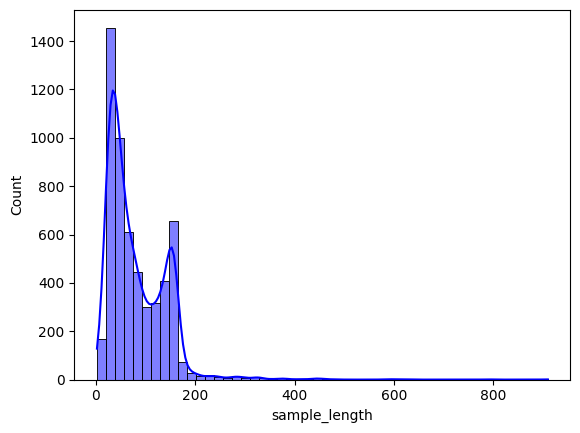

In [114]:
plot_sample_length_distribuition(spam_df)

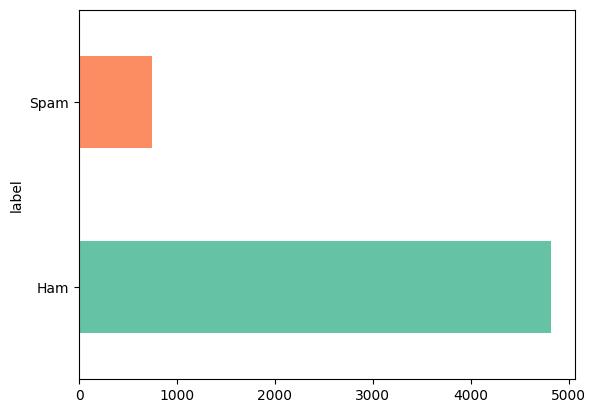

In [115]:
plot_class_distribuition(spam_df)